In [1]:
#Project 1 Gravitational microlensing
#Aidan Boyce

In [2]:
import numpy as np
import astropy.units as u
import astropy.constants as const
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import optimize
import sympy
import emcee
import corner
sympy.init_printing()
data1=np.loadtxt('proj1data1.txt')
data2=np.loadtxt('proj1data2.txt')
data3=np.loadtxt('proj1data3.txt')

Text(0.5, 1.0, 'Data 3')

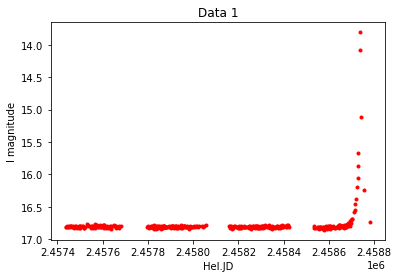

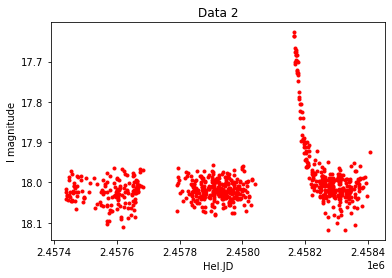

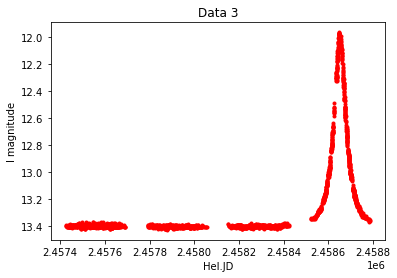

In [3]:
fig,ax=plt.subplots(1)
ax.plot(data1[:,0],data1[:,1], 'r.')
ax.invert_yaxis()
plt.xlabel('Hel.JD')
plt.ylabel('I magnitude')
plt.title('Data 1')
fig,ax=plt.subplots(1)
ax.plot(data2[:,0],data2[:,1], 'r.')
ax.invert_yaxis()
plt.xlabel('Hel.JD')
plt.ylabel('I magnitude')
plt.title('Data 2')
fig,ax=plt.subplots(1)
ax.plot(data3[:,0],data3[:,1], 'r.')
ax.invert_yaxis()
plt.xlabel('Hel.JD')
plt.ylabel('I magnitude')
plt.title('Data 3')


16.810999806883316
991.7296516591932
Optimization terminated successfully.
         Current function value: 2161913.451085
         Iterations: 155
         Function evaluations: 332
[4.95299772e-02 2.72037277e+06 5.18107558e+01 1.66369964e+01
 8.67006398e-01]


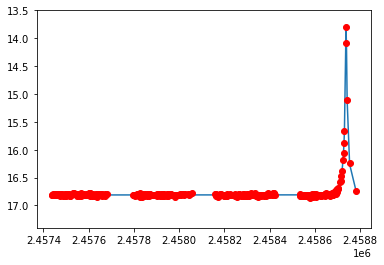

In [38]:


def model(par,dat):
    u_0 = par[0]
    t_0 = par[1]
    t_E = par[2] 
    m_src = par[3]
    fbl = par[4] 
    model = []
    for i in range(len(dat)):
        u = np.sqrt(u_0**2 + (((dat[i,0]-t_0)**2)/t_E**2))
        A = (u**2 + 2.0)/(u* np.sqrt(u**2 + 4.0))
        Abl = (fbl*A)+(1-fbl)
        mag = (m_src - 2.5*np.log10(Abl))
        
        model.append(mag)
    return(model)



plt.plot(data1[:,0],model([0.048,2458738.369,23.127,16.811,0.885],data1)) 
plt.plot(data1[:,0],data1[:,1],'ro')
plt.ylim(17.4,13.5)
#
#plt.plot(data1[:,0],model([10.75,2.49,1.77,16.63],data1))
#plt.ylim(17.4,13.5)


def chisq(par,dat):
    chisq = 0
    mod=model(par,dat)
    if par[2] <= 0:
        chisq = 10000000000000000000000
        return(chisq)
    if par[4] < 0:
        chisq = 10000000000000000000000
        return(chisq)
    if par[4] > 1:
        chisq = 10000000000000000000000
        return(chisq)
    for i in range(len(dat)):
        chisq = chisq + (((mod[i] - dat[i,1])**2)/dat[i,2]**2) 
    #print(par,chisq)
    return(chisq)

def lnprob(par,dat):
    return -0.5*chisq(par,dat)

print(model([0.047,2458738.369,23.127,16.811,0.885],data1)[1])
print(chisq([0.047,2458738.369,23.127,16.811,0.885],data1))
#print(chisq([0.047,8738,23.127,16.75],data1))
      
  
     
      


#
#def chisq(par,dat):
#    m_src = par[0]
#    u_min = par[1]
#    t_0 = par[2]
#    t_E = par[3]
#    chisq = 0
#    for i in range(len(dat)):
#        u = np.sqrt(u_min**2+(((dat[i,0]-2450000)-t_0)/t_E)**2)
#        A = (u**2+2)/(u*np.sqrt(u**2+4))
#        mag = m_src - 2.5*np.log(A)
#        chisq = chisq + (mag - dat[i,1])**2 / dat[i,2]**2
#    return chisq
#
#
#def lnprob(par,dat):
#    return -0.5*chisq(par,dat)


#print('marker')

opt=optimize.fmin(chisq,[0.047, 2458738.369, 23.127, 16.811,0.885],args = (data1[0:415],))
print(opt)

#print(chisq([2.34466354e-02, 3.61902604e+06, 3.02598896e+06, 1.79025101e+01],data1))
#print(chisq([10.86913589,2.33951384,1.71792194,16.80563288],data1))

#print(chisq([0.04538833,2.33951384,1.71792194,16.80563288],data1))

#print(chisq([4.88999186e-02,2.58580157e+06,1.71792194,16.80563288],data1))

In [39]:
def mcmc_plot(sampler):
    labels = [r'$t_{peak}$',r'$f_{bl}$',r'$f_0$',r'$u_{min}$',r'$\tau$']
    f,ax = plt.subplots(ndim,1,figsize=(10,10))
    for idim in range(ndim):
        for idim in range(nwalk):
            ax[idim].plot(sampler.chain[iwalk,:idim])
        ax[idim].set_xlabel('step')
        ax[idim].set_ylabel(labels[idim])
    f.tight_layout()
    f.show()

In [40]:
ndim = 5
nwalk = 20
nburn = 500
nmain = 1000

plab = ['u_0','t_0','t_E','m_src','fbl']
p0 = np.array([0.0468202686,2458738.37,23.1619667,16.8110030,0.883975482])
pstart = np.array([p0 + 1.0e-4*np.random.normal(size=ndim) for i in range(nwalk)])
sampler = emcee.EnsembleSampler(nwalk,ndim,lnprob, args=(data1,)) 
print('burn-in run')
pos,prob,state = sampler.run_mcmc(pstart,nburn)
print('main run')
sampler.reset()
res = sampler.run_mcmc(pos,nmain)
samples = sampler.get_chain(flat=True)

burn-in run
main run


<ipython-input-41-e0f3bb5f4ff2>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


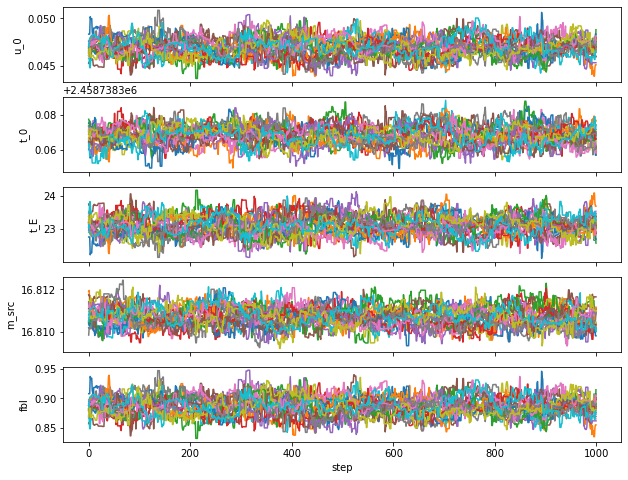

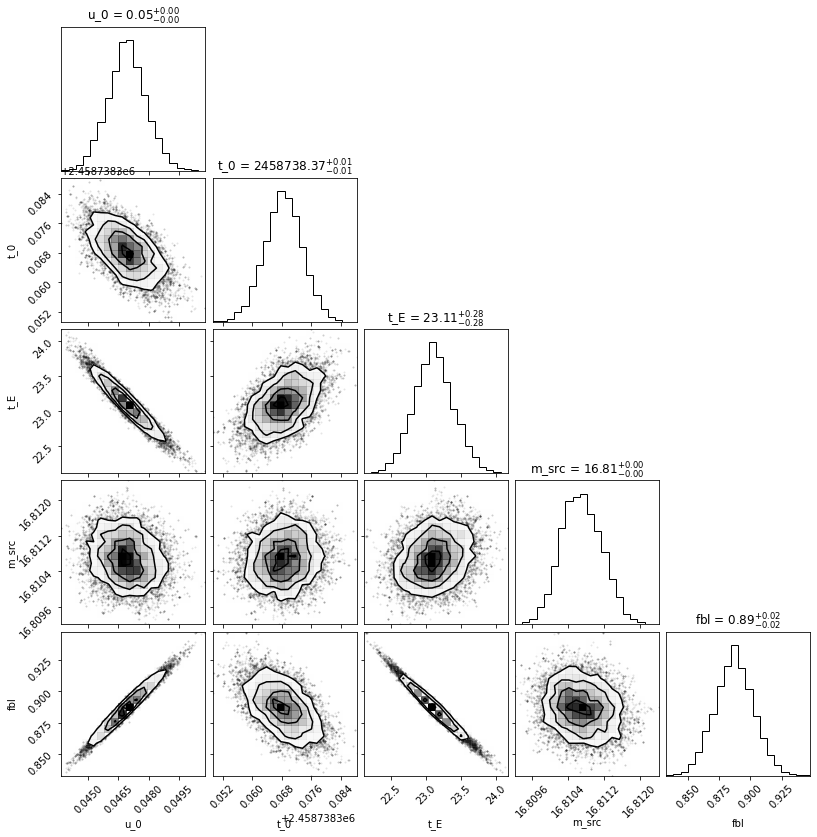

In [41]:
f,ax = plt.subplots(ndim,1,figsize=(10,8),sharex=True)
for idim in range(ndim):
    for iwalk in range(nwalk):
        ax[idim].plot(sampler.chain[iwalk,:,idim])
    ax[idim].set_ylabel(plab[idim])
ax[-1].set_xlabel('step')
f.show()
f=corner.corner(samples,show_titles=True, labels=plab)